In [7]:
# 샘플데이터를 불러오기 위한 작업
# 당뇨병 환자 데이터

from sklearn.datasets import load_diabetes
diabetes = load_diabetes() # 딕셔너리 구조
diabetes.keys()
# type(diabetes)
diabetes['data']
print(diabetes.DESCR)
# 영어 한글 번역 파이썬 모듈 찾아보기

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

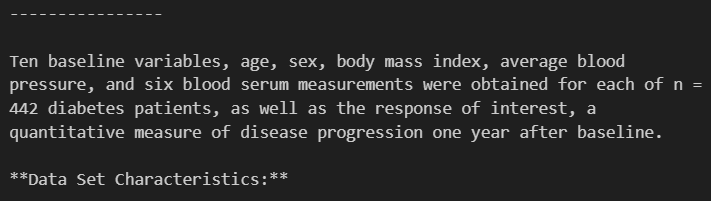
##### print(diabetes.DESCR)
###### 해당 부분만 번역하는 방법 찾아보기

In [8]:
import numpy as np
np.shape(diabetes.data)

(442, 10)

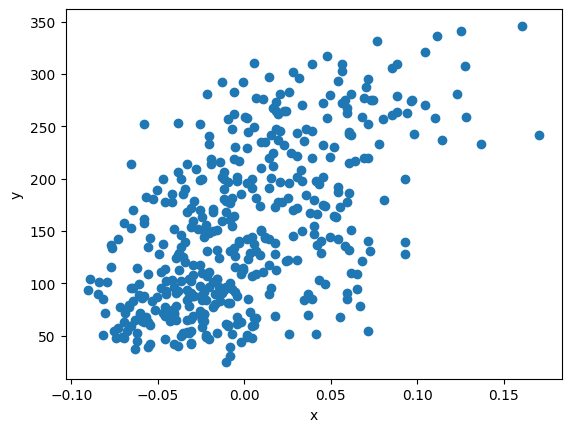

In [10]:
# 샘플로 x데이터는 자료의 2번째를 사용
# y데이터는 이 자료의 y 값을 사용함 (target이 y값임)

import matplotlib.pyplot as plt
plt.scatter(diabetes.data[:, 2], diabetes.target)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [12]:
x = diabetes.data[:,2]  # 의미없는 x값 (442개의 행과 1개의 열)
y = diabetes.target

#### 인공신경망 (뉴런)
- w,b 초기값 생성(무작위 생성 또는 지정)
- y hat(여러 개의 계산식 중 한개를 택함)을 계산해 원래의 y값과의 차이인 오차 계산
- 오차가 0이 되게끔 w,b 값 없데이트 (경사하강)
- 업데이트 된 w,b를 이용해 다시 오차 계산 (오차 역전파)

#### 경사하강법
- 오차가 0이 되게끔 w, b 값을 변경하는 것
- 미분이 사용됨 : 오차가 내려가도록

587.8654539985616 99.4093556453094
796.8938154365641 114.80085167129954
871.7846906737017 120.31533114511586
898.6166629247405 122.2910639663954
908.230046833004 122.99893135435386


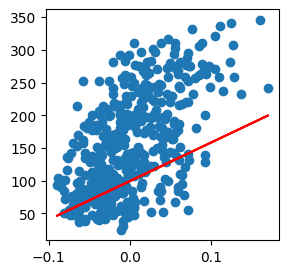

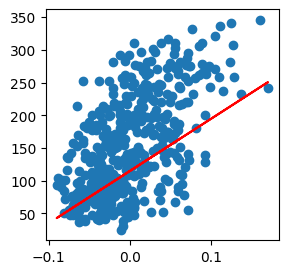

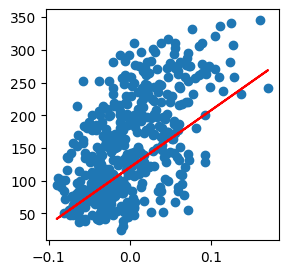

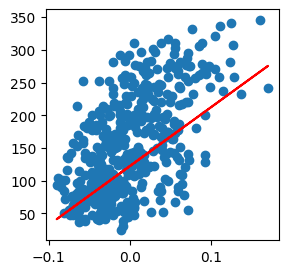

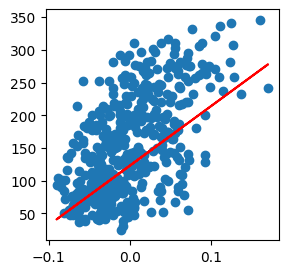

In [35]:
# 실행 횟수는 사용자가 지정 -> 지정된 만큼 순전파 역전파 반복 
# w, b를 정규 분포에 근거해 무작위로 생성함 (비슷하게)
# train에 맞춰 w,b를 계속 계산 -> 실제 테스트에서는 오차 이슈 (오버피팅)
# 오차가 적으면 더 이상 실행을 안 함
# w, b의 갱신 시점
# -> 배치 당(오차계산 할 x,y 행의 갯수) : 배치가 작을수록 오버피티될 확률이 높음
# -> 에포크 당

class Neuron:
    
    def __init__(self):
        self.w = 1.0     # 가중치를 초기화합니다 -> 원래는 random하게 나옴
        self.b = 1.0     # 절편을 초기화합니다
    
    def forpass(self, x): # 순전파
        y_hat = x * self.w + self.b       # 직선 방정식을 계산합니다
        #print(y_hat)
        return y_hat
    
    def backprop(self, x, err): # 역전파
        w_grad = x * err    # 가중치에 대한 그래디언트를 계산합니다
        b_grad = 1 * err    # 절편에 대한 그래디언트를 계산합니다
        return w_grad, b_grad

    def fit(self, x, y, epochs=5):
        for i in range(epochs):           # 에포크만큼 반복합니다
            for x_i, y_i in zip(x, y):    # 모든 샘플에 대해 반복합니다
                y_hat = self.forpass(x_i) # 정방향 계산
                err = -(y_i - y_hat)      # 오차 계산 => 경사하강
                w_grad, b_grad = self.backprop(x_i, err)  # 역방향 계산
                self.w -= w_grad          # 가중치 업데이트
                self.b -= b_grad          # 절편 업데이트

                # print(x,y,y_hat,err,w_grad,b_grad,self.w,self.b)
                # print('-'*100)
                # print(neuron.w, neuron.b)
                # plt.figure(figsize=(3,3))
                # plt.scatter(x,y)
                # plt.plot(x, x*neuron.w + neuron.b, 'r')
                # plt.show()
                # batch당 그래프를 보여줌
            print(neuron.w, neuron.b)
            plt.figure(figsize=(3,3))
            plt.scatter(x,y)
            plt.plot(x, x*neuron.w + neuron.b, 'r')
            #plt.show()
            # epoch당 그래프를 보여줌, 보통 이렇게 보는 것이 맞음 (batch당 보는 경우는 없음)


neuron = Neuron()  # 인스턴스 생성
cnt=len(x)
neuron.fit(x[:cnt], y[:cnt])


In [26]:
x[0], y[0]

(0.061696206518683294, 151.0)

In [17]:
# for x_i, y_i in zip(x, y):    # 모든 샘플에 대해 반복합니다
    # print(x_i)
    # print('-'*100)

print(x[:3])
print(y[:3])
# 0.0616*w + b -> 151이 나와야 함 : 오차 계산

[ 0.06169621 -0.05147406  0.04445121]
[151.  75. 141.]
